In [2]:
import sys
sys.path.append('..')
from hijacobi import Task, Spherically_Symmetric, repOfan
import torch
import matplotlib.pyplot as plt

21:17:12|TQ-WARNING| Error enabling CUDA. cuda.is_available() returned False. CPU will be used.


In [17]:
# Инициализация нужных объектов
metric_f = lambda r: 1-2/r

# *** Тут нужно придумать ещё более простую тестовую модель ***
BH = Spherically_Symmetric(f=metric_f)


# Задаём граничные условия для задачи
th_lims = torch.Tensor([torch.pi/1.9, torch.pi*60/180])

r_s = torch.Tensor([2.1, 3, 4, 5])
r_obs = torch.Tensor([500])

# Превращаем в набор:
eq_data0 = [{'r_s': r_, 'r_obs': r_obs, 'th_s': th_lims[0], 'th_obs': th_lims[1], 'n_th':0, 'n_r':0} for r_ in r_s]
eq_data1 = [{'r_s': r_, 'r_obs': r_obs, 'th_s': th_lims[0], 'th_obs': th_lims[1], 'n_th':1, 'n_r':0} for r_ in r_s]

eq_data = eq_data0 + eq_data1

# Инициализация задачи
Task0 = Task(BH, eq_data)


# Проверяем инициализацию решателя
Solver0 = repOfan(BH)
#Solver0.setup(q0=2.5, tol=1e-4, maxiter=30, integr_N=25)
Solver0.setCustomIth(BH.Ith)
Task0.set_solver(Solver0)


Test passed, setting fuction as Ith


In [18]:
Task0.eq_data

[{'r_s': tensor(2.1000),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0472),
  'n_th': 0,
  'n_r': 0},
 {'r_s': tensor(3.),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0472),
  'n_th': 0,
  'n_r': 0},
 {'r_s': tensor(4.),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0472),
  'n_th': 0,
  'n_r': 0},
 {'r_s': tensor(5.),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0472),
  'n_th': 0,
  'n_r': 0},
 {'r_s': tensor(2.1000),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0472),
  'n_th': 1,
  'n_r': 0},
 {'r_s': tensor(3.),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0472),
  'n_th': 1,
  'n_r': 0},
 {'r_s': tensor(4.),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0472),
  'n_th': 1,
  'n_r': 0},
 {'r_s': tensor(5.),
  'r_obs': tensor([500.]),
  'th_s': tensor(1.6535),
  'th_obs': tensor(1.0

In [19]:
# Проверяем сборку фрейма решения
print(Task0.get_solution_frame())

[{'r_s': tensor(2.1000), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': tensor(1.0472), 'n_th': 0, 'n_r': 0, 'res': None}, {'r_s': tensor(3.), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': tensor(1.0472), 'n_th': 0, 'n_r': 0, 'res': None}, {'r_s': tensor(4.), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': tensor(1.0472), 'n_th': 0, 'n_r': 0, 'res': None}, {'r_s': tensor(5.), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': tensor(1.0472), 'n_th': 0, 'n_r': 0, 'res': None}, {'r_s': tensor(2.1000), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': tensor(1.0472), 'n_th': 1, 'n_r': 0, 'res': None}, {'r_s': tensor(3.), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': tensor(1.0472), 'n_th': 1, 'n_r': 0, 'res': None}, {'r_s': tensor(4.), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': tensor(1.0472), 'n_th': 1, 'n_r': 0, 'res': None}, {'r_s': tensor(5.), 'r_obs': tensor([500.]), 'th_s': tensor(1.6535), 'th_obs': te

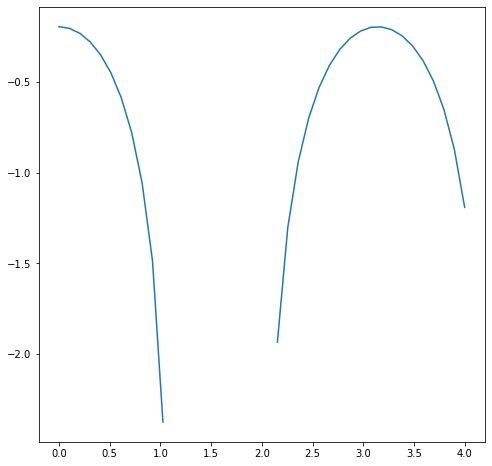

In [20]:
# Убеждаемся, что уравнения имеют решения
eq00 = Task0.make_eq(0)
gma = torch.Tensor([torch.pi/8])
eq_p = lambda p: eq00(Solver0.L(gma, p), Solver0.Q(gma, p))

p_s = torch.linspace(0, 4, 40)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(p_s, eq_p(p_s))

plt.show()